In [ ]:
# import modules
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
from parse import parse
import pandas as pd
import numpy as np
import os

In [58]:
# base data folder and time window (in minutes!) to consider
data_folder = "../data/azurefunctions-dataset2019"
time_window = 15

In [81]:
# read dataset
all_data = pd.DataFrame()
for filename in os.listdir(data_folder):
  if filename.startswith("invocations_"):
    # which day is it
    day = int(parse("invocations_per_function_md.anon.d{}.csv", filename)[0])
    # load data
    data = pd.read_csv(os.path.join(data_folder, filename))
    data["DAY"] = [day] * len(data)
    # merge
    all_data = pd.concat([all_data, data], ignore_index = True)

In [59]:
# filter http requests
http_data = pd.DataFrame()
if os.path.exists(os.path.join(data_folder, "http_data.csv")):
  http_data = pd.read_csv(os.path.join(data_folder, "http_data.csv"))
else:
  http_data = all_data[all_data["Trigger"] == "http"]
  http_data.describe()
  http_data.to_csv(os.path.join(data_folder, "http_data.csv"), index = False)

In [60]:
# group by function ID
functions = http_data.groupby("HashFunction").groups
len(functions)

30440

In [61]:
# filter functions that have been executed in all the 14 days
alldays_functions = []
if not os.path.exists(os.path.join(data_folder, "alldays_functions.txt")):
  # build
  for fid in functions:
    if len(http_data[http_data["HashFunction"] == fid]) >= 14:
      alldays_functions.append(fid)
  # write
  with open(os.path.join(data_folder, "alldays_functions.txt"), "w") as ost:
    for line in alldays_functions:
      ost.write(f"{line}\n")
else:
  # read
  with open(os.path.join(data_folder, "alldays_functions.txt"), "r") as ist:
    alldays_functions = [fid[:-1] for fid in ist.readlines()]

len(alldays_functions)

6385

In [62]:
fid = alldays_functions[1000]
fid_data = http_data[http_data["HashFunction"] == fid].set_index("DAY")
fid_data

HashOwner  \
DAY                                                      
13   619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
7    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
6    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
12   619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
4    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
10   619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
11   619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
5    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
1    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
14   619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
2    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
3    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
8    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   
9    619bf16f8aea82393a7a416da43ca1b8954062fda3aba8...   

                                               HashApp  \
DAY                                                      
13   1d8869698743d5138e3ef64781e9be9c241db94d795019...   
7    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
6    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
12   1d8869698743d5138e3ef64781e9be9c241db94d795019...   
4    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
10   1d8869698743d5138e3ef64781e9be9c241db94d795019...   
11   1d8869698743d5138e3ef64781e9be9c241db94d795019...   
5    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
1    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
14   1d8869698743d5138e3ef64781e9be9c241db94d795019...   
2    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
3    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
8    1d8869698743d5138e3ef64781e9be9c241db94d795019...   
9    1d8869698743d5138e3ef64781e9be9c241db94d795019...   

                                          HashFunction Trigger  1  2  3  4  5  \
DAY                                                                             
13   27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
7    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
6    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  1   
12   27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
4    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
10   27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
11   27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
5    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
1    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
14   27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
2    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
3    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
8    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   
9    27726bacce9214f9085b424591916a78eb39766a775ea2...    http  0  0  0  0  0   

     6  ...  1431  1432  1433  1434  1435  1436  1437  1438  1439  1440  
DAY     ...                                                              
13   0  ...     0     0     0     0     0     0     0     0     2     0  
7    0  ...     0     0     0     0     0     0     0     0     0     0  
6    0  ...     0     0     0     2     0     0     0     0     0     0  
12   0  ...     0     0     0     0     0     0     0     0     0     0  
4    0  ...     0     0     0     1     0     0     2     0     0     0  
10   0  ...     0     0     1     0     0     0     0     0     0     0  
11   0  ...     0     0     0     0     0     0     0     0     0     0  
5    0  ...     0     0     0     0     0     0     0     0     0     0  
1    0  ...     0     0     0     0     0     0     0     0     0     0  
14   0  ...     0     0     0     2     0     0     0     0     0     0  
2 

In [63]:
fid_invocations = fid_data[[str(i) for i in range(1,1441)]].transpose()
fid_invocations

DAY   13  7   6   12  4   10  11  5   1   14  2   3   8   9 
1      0   0   0   0   0   0   0   0   0   0   0   0   0   0
2      0   0   0   0   0   0   0   0   0   0   0   0   0   0
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0
4      0   0   0   0   0   0   0   0   0   0   0   0   0   0
5      0   0   1   0   0   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
1436   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1437   0   0   0   0   2   0   0   0   0   0   0   0   0   0
1438   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1439   2   0   0   0   0   0   0   0   0   0   0   0   0   0
1440   0   0   0   0   0   0   0   0   0   0   0   0   1   0

[1440 rows x 14 columns]

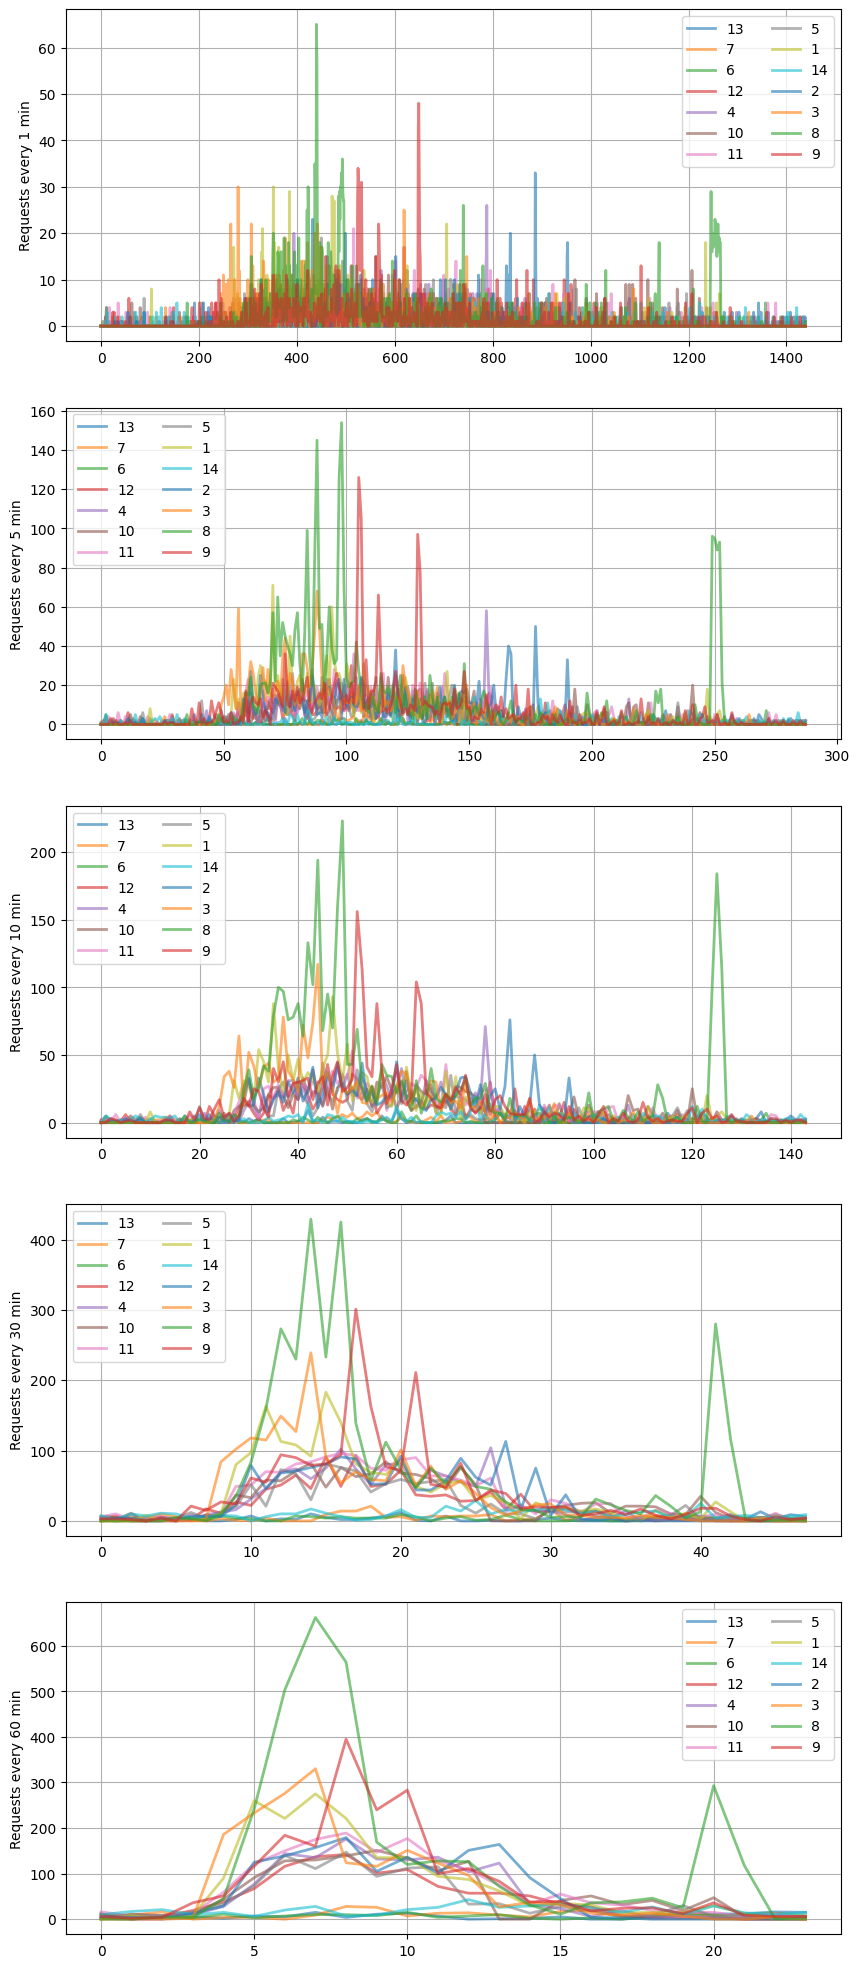

In [197]:
fid_invocations_grouped = {}
for window in [1, 5, 10, 30, 60]:
  fid_invocations_grouped[window] = {}
  for day in fid_invocations:
    fid_invocations_grouped[window][day] = [
      sum(fid_invocations[day][i*window:(i+1)*window]) 
        for i in range(int(len(fid_invocations)/window))
    ]
  fid_invocations_grouped[window] = pd.DataFrame(
    fid_invocations_grouped[window]
  )

_, axs = plt.subplots(
  nrows = 5,
  ncols = 1,
  figsize = (10, 25)
)
idx = 0
for window, window_data in fid_invocations_grouped.items():
  window_data.plot(
    alpha = 0.6, 
    linewidth = 2,
    ax = axs[idx],
    # legend = False,
    grid = True
  )
  axs[idx].set_ylabel(f"Requests every {window} min")
  axs[idx].legend(ncol = 2)
  idx += 1
plt.show()

# fid_invocations.rolling(window = 60, min_periods = 60).sum().plot(alpha = 0.6, linewidth = 2)
# plt.show()

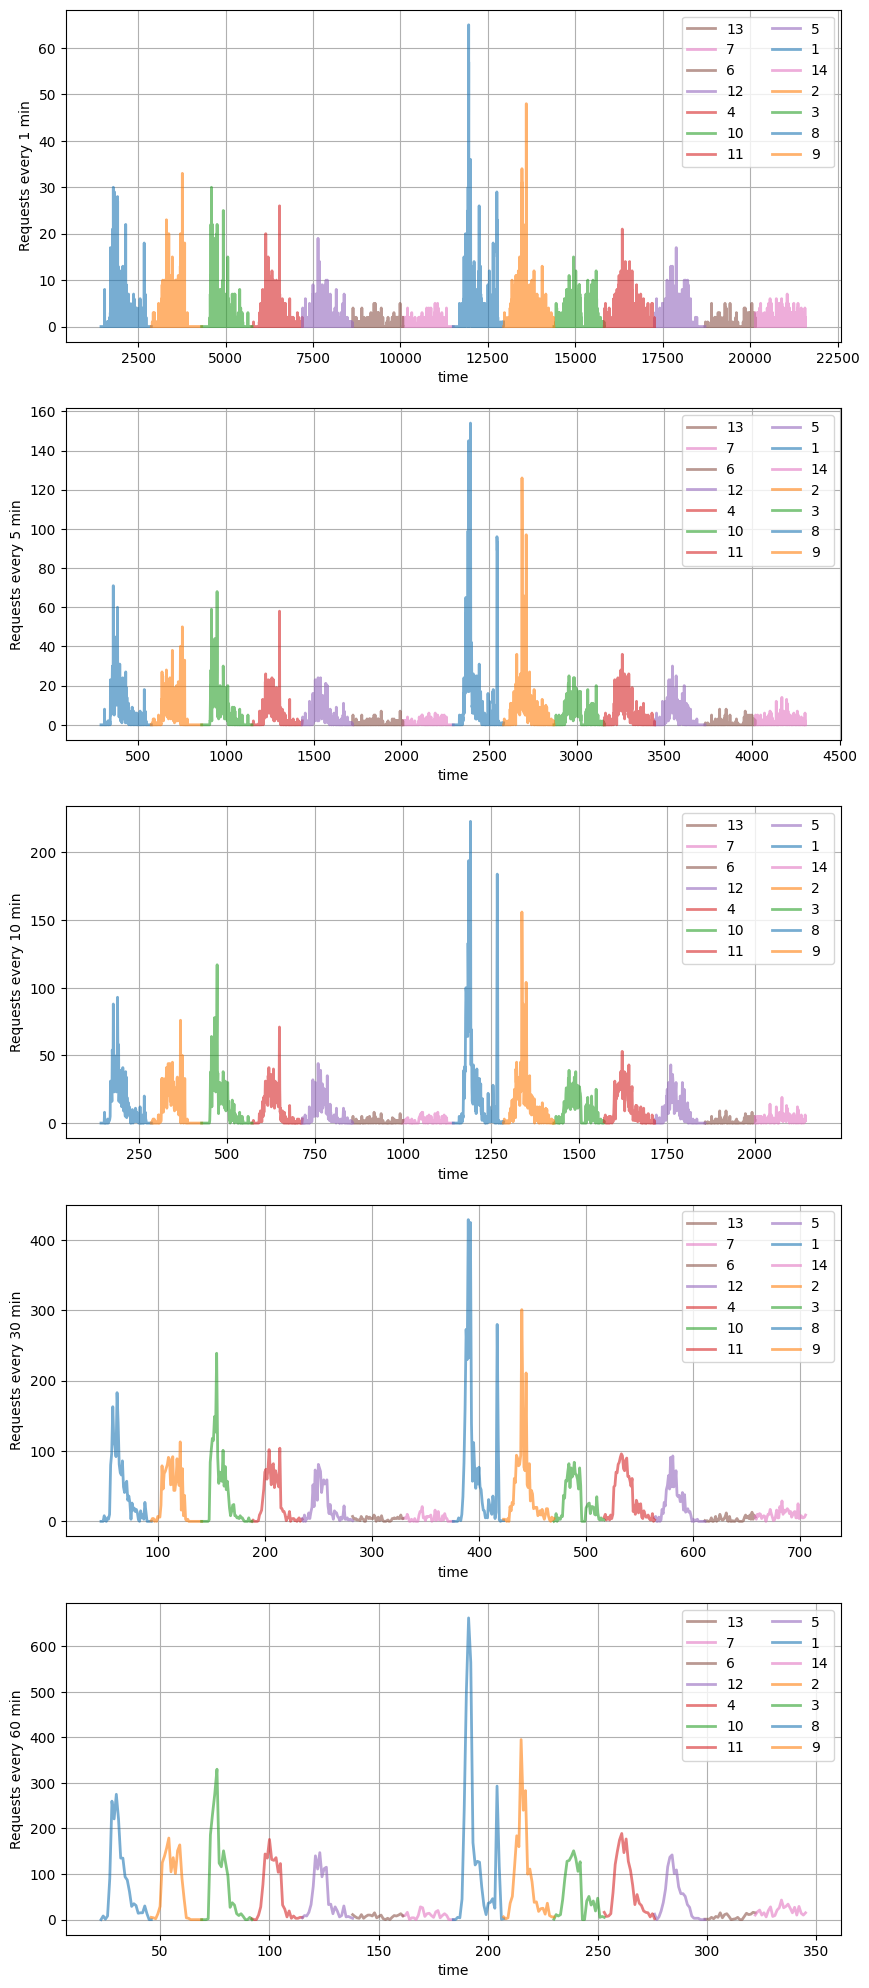

In [202]:
fid_invocations_grouped = {}
for window in [1, 5, 10, 30, 60]:
  fid_invocations_grouped[window] = {}
  for day in fid_invocations:
    fid_invocations_grouped[window][day] = [
      sum(fid_invocations[day][i*window:(i+1)*window]) 
        for i in range(int(len(fid_invocations)/window))
    ]
  fid_invocations_grouped[window] = pd.DataFrame(
    fid_invocations_grouped[window]
  )

colors = list(mcolors.TABLEAU_COLORS.values())[:7] * 2
_, axs = plt.subplots(
  nrows = 5,
  ncols = 1,
  figsize = (10, 25)
)
idx = 0
for window, window_data in fid_invocations_grouped.items():
  for day in window_data.columns:
    to_plot = pd.DataFrame(window_data[day].copy(deep = True))
    to_plot["time"] = to_plot.index + day * to_plot.index.max()
    to_plot.plot(
      x = "time",
      y = day,
      alpha = 0.6, 
      linewidth = 2,
      ax = axs[idx],
      color = colors[day - 1],
      # legend = False,
      grid = True
    )
  axs[idx].set_ylabel(f"Requests every {window} min")
  axs[idx].legend(ncol = 2)
  idx += 1
plt.show()

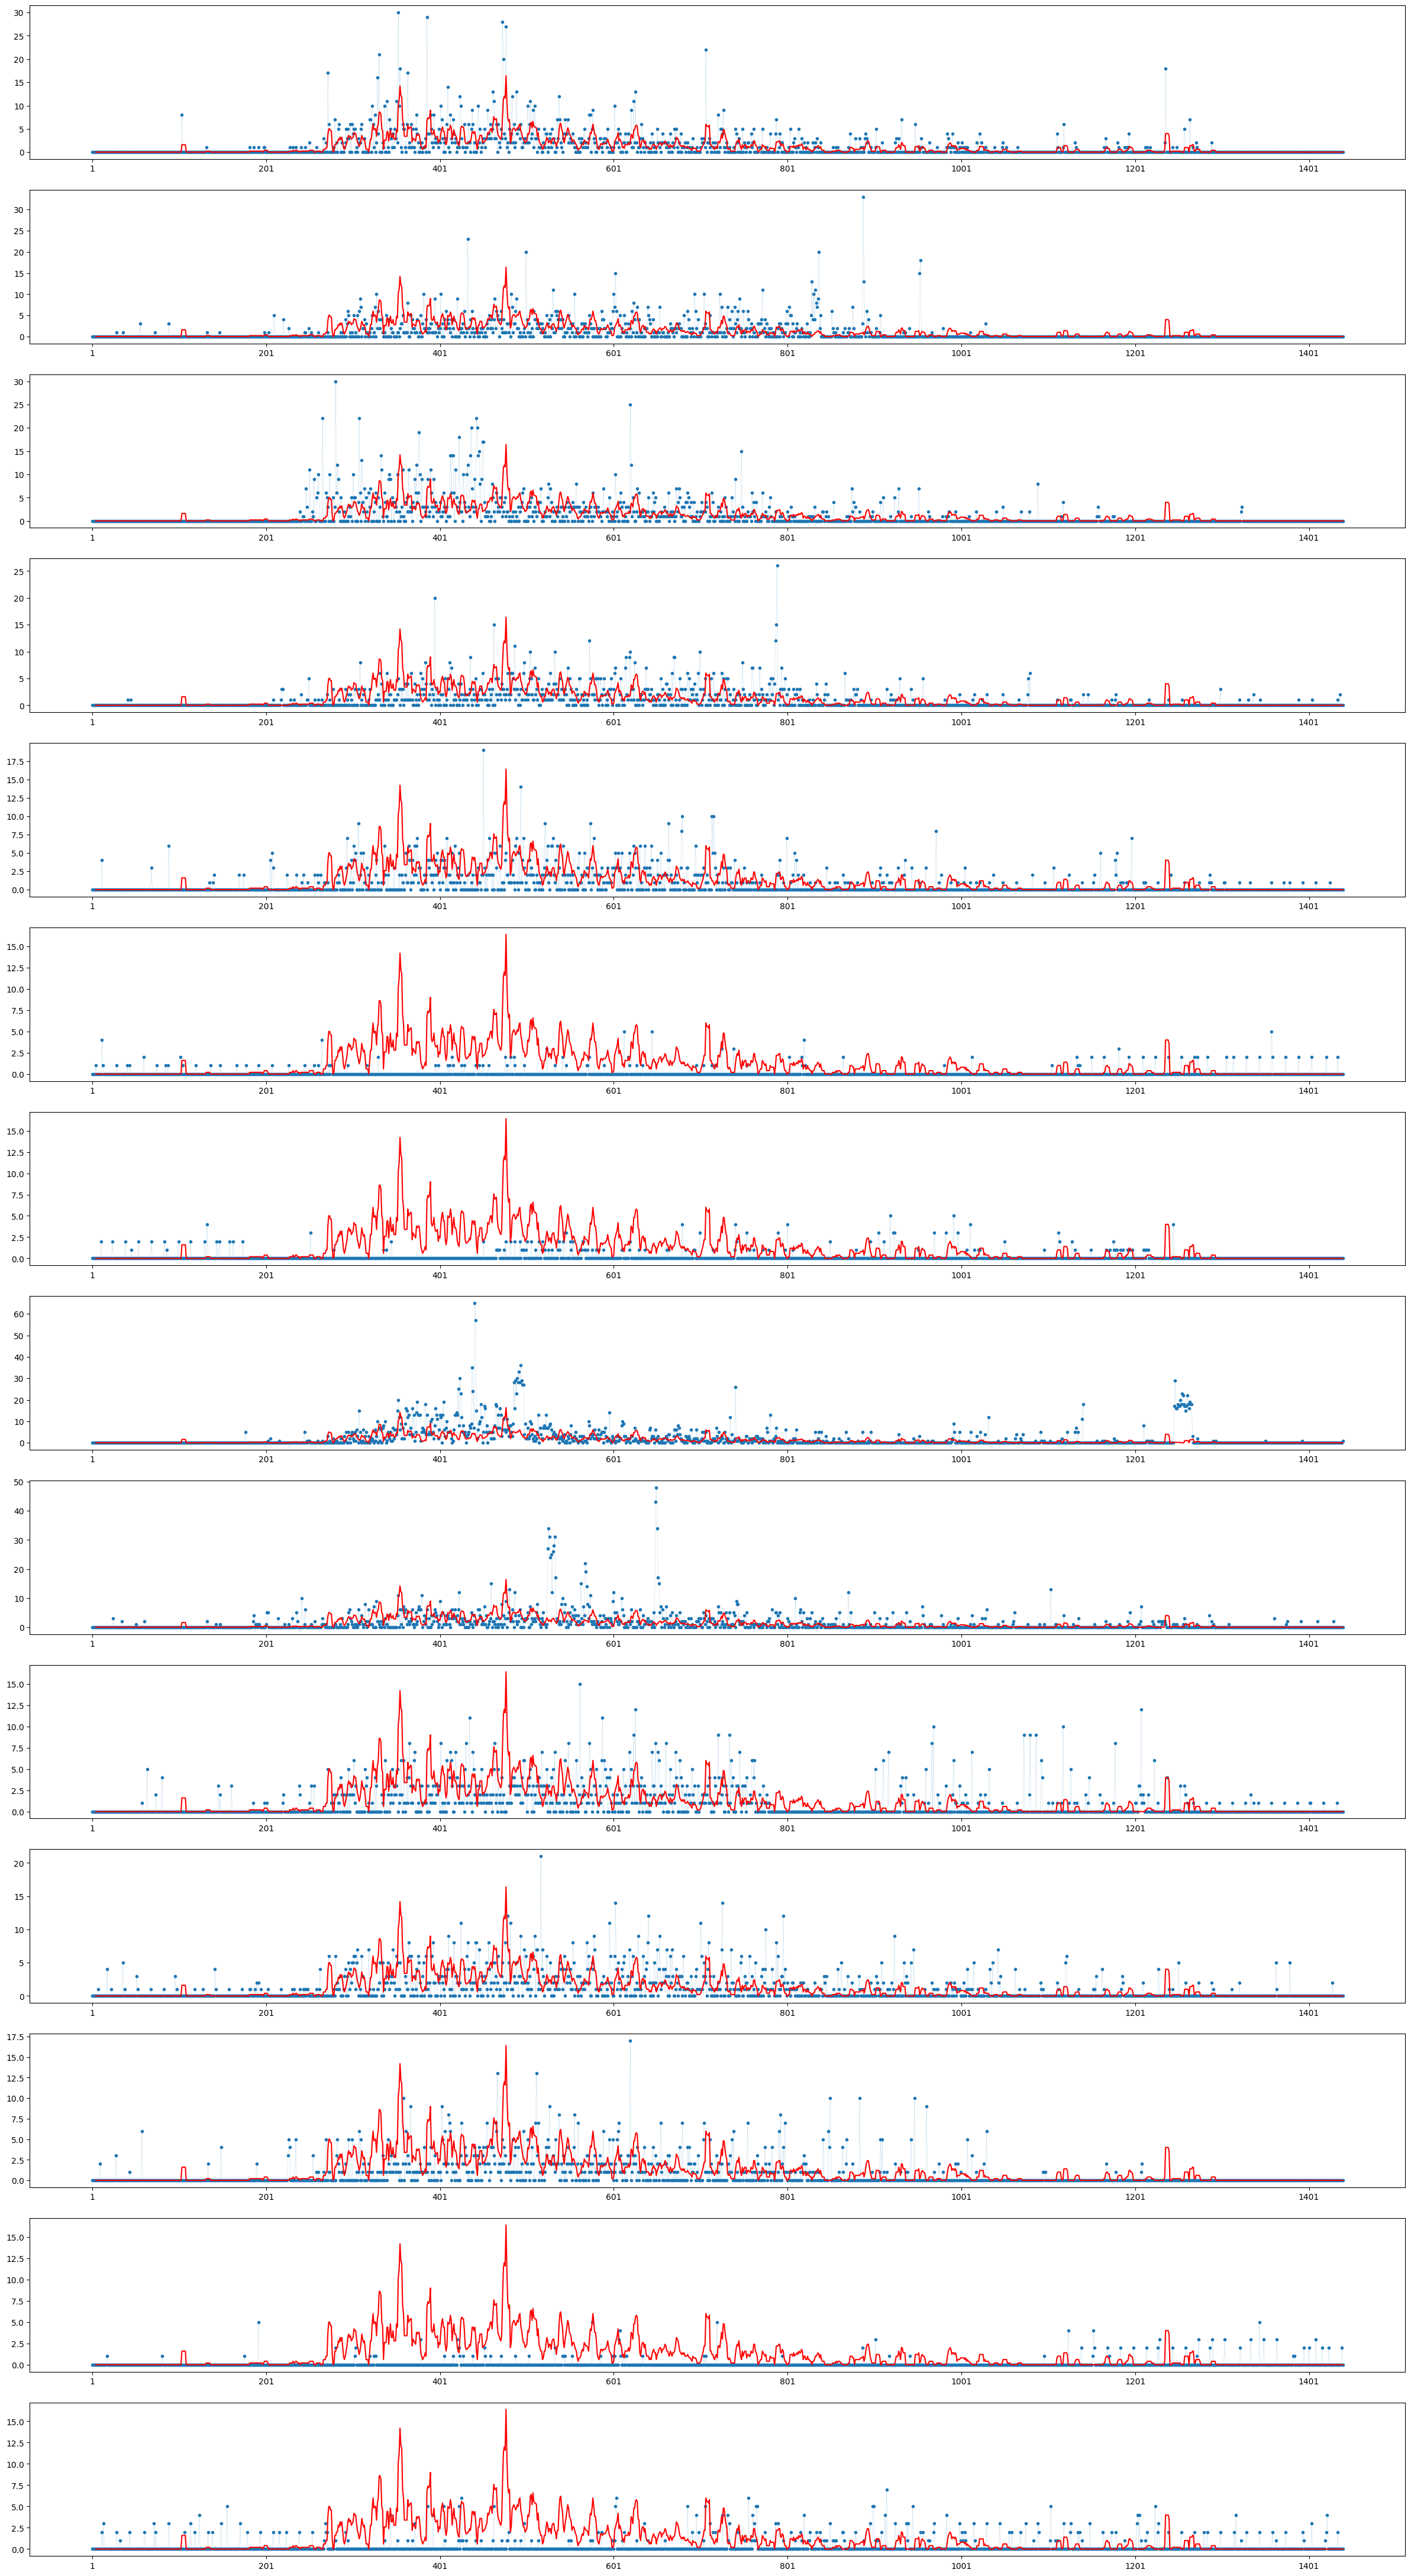

In [64]:
_, axs = plt.subplots(nrows = 14, ncols = 1, figsize = (30,4 * 14))
for day in range(1,15):
  avg = fid_invocations[1].rolling(window = 5).mean()
  fid_invocations[day].plot(marker = ".", linewidth = 0.1, ax = axs[day-1])
  avg.plot(color = "red", ax = axs[day-1])

In [65]:
alldays_functions_df = pd.DataFrame()
if os.path.exists(os.path.join(data_folder, "alldays_functions.csv")):
  alldays_functions_df = pd.read_csv(
    os.path.join(data_folder, "alldays_functions.csv")
  )
else:
  alldays_functions_df = http_data.set_index("HashFunction").loc[
    alldays_functions
  ]
  alldays_functions_df.to_csv(
    os.path.join(data_folder, "alldays_functions.csv")
  )
alldays_functions_df.describe()

1             2             3             4             5  \
count  89390.000000  89390.000000  89390.000000  89390.000000  89390.000000   
mean      23.505191     20.406611     19.353910     20.173375     19.561316   
std      933.698073    777.296869    749.058587    767.043364    731.897636   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max    75217.000000  65324.000000  60724.000000  61957.000000  60878.000000   

                  6             7             8             9            10  \
count  89390.000000  89390.000000  89390.000000  89390.000000  89390.000000   
mean      19.734433     19.351102     19.333281     19.241224     19.031357   
std      731.300034    747.250553    759.589108    747.729042    750.682670   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    59370.000000  63283.000000  61412.000000  60450.000000  62496.000000   

       ...          1432          1433          1434          1435  \
count  ...  89390.000000  89390.000000  89390.000000  89390.000000   
mean   ...     18.828784     18.525036     19.161215     18.775847   
std    ...    768.300929    744.238953    761.816685    731.979205   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...  64841.000000  60062.000000  61541.000000  60310.000000   

               1436          1437          1438          1439          1440  \
count  89390.000000  89390.000000  89390.000000  89390.000000  89390.000000   
mean      19.176138     19.064560     18.831458     18.815371     18.503188   
std      736.697294    755.994761    759.274982    747.191425    751.502508   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    60140.000000  63306.000000  61661.000000  60447.000000  61655.000000   

                DAY  
count  89390.000000  
mean       7.500000  
std        4.031151  
min        1.000000  
25%        4.000000  
50%        7.500000  
75%       11.000000  
max       14.000000  

[8 rows x 1441 columns]

In [66]:
alldays_functions_df

HashFunction  \
0      0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...   
1      0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...   
2      0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...   
3      0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...   
4      0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...   
...                                                  ...   
89385  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...   
89386  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...   
89387  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...   
89388  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...   
89389  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...   

                                               HashOwner  \
0      1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...   
1      1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...   
2      1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...   
3      1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...   
4      1e6aa0ace3f2c0df114126e303bd6c84343690c7bb3634...   
...                                                  ...   
89385  dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...   
89386  dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...   
89387  dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...   
89388  dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...   
89389  dcc221062c4b0a281b332a48dd98b53e609ceda743d2e6...   

                                                 HashApp Trigger  1  2  3  4  \
0      d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...    http  0  0  0  0   
1      d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...    http  0  0  0  0   
2      d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...    http  0  0  0  0   
3      d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...    http  0  0  0  0   
4      d0c1af9d7aa9c97fc6495af1a7283f3d1799ce13868623...    http  0  0  0  0   
...                                                  ...     ... .. .. .. ..   
89385  01857570bb7d57960c0369c93e53f2cd9577226229a443...    http  0  0  0  0   
89386  01857570bb7d57960c0369c93e53f2cd9577226229a443...    http  0  0  1  0   
89387  01857570bb7d57960c0369c93e53f2cd9577226229a443...    http  0  0  0  0   
89388  01857570bb7d57960c0369c93e53f2cd9577226229a443...    http  0  0  0  0   
89389  01857570bb7d57960c0369c93e53f2cd9577226229a443...    http  0  0  0  0   

       5  6  ...  1432  1433  1434  1435  1436  1437  1438  1439  1440  DAY  
0      0  0  ...     0     0     0     0     0     0     0     0     0   13  
1      0  0  ...     0     0     0     0     0     0     0     0     0    7  
2      0  0  ...     0     0     0     0     0     0     0     0     0    6  
3      0  0  ...     0     0     0     0     0     0     0     0     0   12  
4      0  0  ...     0     0     0     0     0     0     0     0     0    4  
...   .. ..  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  
89385  0  0  ...     0     0     0     0     0     0     0     0     0   14  
89386  0  0  ...     0     0     0     0     0     0     0     0     0    2  
89387  0  0  ...     0     0     0     0     0     0     0     0     0    3  
89388  0  0  ...     0     0     0     0     0     0     0     0     1    8  
89389  1  0  ...     0     0     0     0     0     0     0     0     0    9  

[89390 rows x 1445 columns]

In [86]:
# count owners
alldays_functions_df.groupby("HashOwner").ngroups

2598

In [ ]:
all_invocations = pd.DataFrame()
if os.path.exists(
    os.path.join(data_folder, f"alldays_http_invocations_{time_window}min.csv")
  ):
  all_invocations = pd.read_csv(
    os.path.join(data_folder, f"alldays_http_invocations_{time_window}min.csv")
  )
else:
  for (owner, app), oa_functions in alldays_functions_df.groupby(
      ["HashOwner", "HashApp"]
    ):
    for fid, oaid_data in oa_functions.groupby("HashFunction"):
      # extract invocations
      oaid_invocations = oaid_data.set_index("DAY")[
        [str(i) for i in range(1,1441)]
      ].transpose()
      # group by window
      oaid_invocations_grouped = {}
      for day in oaid_invocations:
        oaid_invocations_grouped[day] = [
          sum(oaid_invocations[day][i*time_window:(i+1)*time_window]) 
            for i in range(int(len(oaid_invocations)/time_window))
        ]
      oaid_invocations_grouped = pd.DataFrame(oaid_invocations_grouped)
      # add hash information
      l = len(oaid_invocations_grouped)
      oaid_invocations_grouped["HashOwner"] = [owner] * l
      oaid_invocations_grouped["HashApp"] = [app] * l
      oaid_invocations_grouped["HashFunction"] = [fid] * l
      oaid_invocations_grouped["time"] = oaid_invocations_grouped.index
      # concat
      all_invocations = pd.concat(
        [all_invocations, oaid_invocations_grouped], ignore_index = True
      )
  # save
  all_invocations.to_csv(
    os.path.join(data_folder, f"alldays_http_invocations_{time_window}min.csv"), 
    index = False
  )

In [88]:
all_invocations

13  7  6  12  4  10  11  5  1  14  2  3  8  9  \
0        0  0  0   0  0   0   0  0  0   0  0  0  0  0   
1        0  0  0   0  0   0   0  0  0   0  0  0  0  0   
2        0  0  0   0  0   0   0  0  0   0  0  0  0  0   
3        0  0  0   0  0   0   0  0  0   0  0  0  0  0   
4        0  0  0   0  0   0   0  0  0   0  0  0  0  0   
...     .. .. ..  .. ..  ..  .. .. ..  .. .. .. .. ..   
612955   1  1  1   1  1   1   1  1  1   1  1  1  1  1   
612956   1  1  1   1  1   1   1  1  1   1  1  1  1  1   
612957   1  1  1   1  1   1   1  1  1   1  1  1  1  1   
612958   1  1  1   1  1   1   1  1  1   1  1  1  1  1   
612959   1  1  1   1  1   1   1  1  1   1  1  1  1  1   

                                                HashOwner  \
0       00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...   
1       00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...   
2       00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...   
3       00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...   
4       00120a3b2acd94c5dab17ee482c500a76294c4e54fe32e...   
...                                                   ...   
612955  ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...   
612956  ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...   
612957  ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...   
612958  ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...   
612959  ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc294...   

                                                  HashApp  \
0       5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...   
1       5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...   
2       5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...   
3       5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...   
4       5151a3e2694a55b3c2c8e6373f7f731ffb510bbbf36611...   
...                                                   ...   
612955  4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...   
612956  4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...   
612957  4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...   
612958  4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...   
612959  4070b1f96eb6f0c01f72134b4f08efda402b9cdffdd85d...   

                                             HashFunction  time  
0       c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...     0  
1       c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...     1  
2       c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...     2  
3       c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...     3  
4       c42de74e2dd1b922a8e2319a6c7e513ee4cd91f8766020...     4  
...                                                   ...   ...  
612955  43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...    91  
612956  43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...    92  
612957  43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...    93  
612958  43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...    94  
612959  43db8355f80b8775d137d00fb1ef11a4d6c2bb1f8a1f4f...    95  

[612960 rows x 18 columns]

In [89]:
fid = alldays_functions[500]
fid

'142fd859b4b21a2906c44711b6cadc540f56df771c2798bac17be9d68e80d096'

<Axes: xlabel='time'>

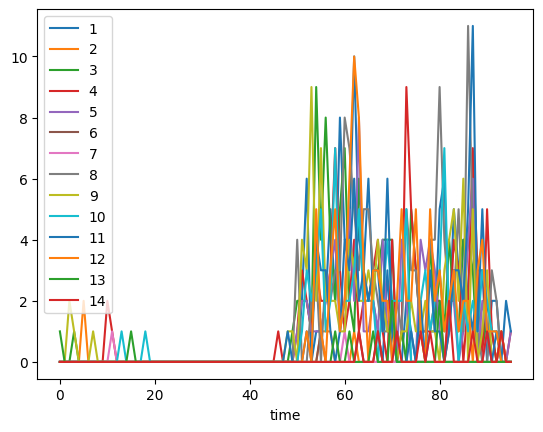

In [90]:
all_invocations[all_invocations["HashFunction"] == fid][
  ["time"] + list(range(1,15))
].plot(
  x = "time"
)

In [91]:
def compute_statistics(data: pd.DataFrame, groupkey: str) -> pd.DataFrame:
  all_stats = pd.DataFrame()
  for _, grouped_data in data.groupby(groupkey):
    df = grouped_data[
      list(range(1,15))
    ].rename(columns = {k: f"req{k}" for k in range(1,15)})
    idx = df.index
    df["idx"] = idx
    df = pd.wide_to_long(df, stubnames = ["req"], i = "idx", j = "day")
    # compute statistics
    stats = pd.DataFrame(df.describe()).transpose()
    stats["idx_min"] = min(idx)
    stats["idx_max"] = max(idx)
    # merge
    all_stats = pd.concat([all_stats, stats], ignore_index = True)
  return all_stats

In [ ]:
def flatten_invocations(data: pd.DataFrame, groupkey: str) -> pd.DataFrame:
  flat_invocations = pd.DataFrame()
  for fid, basedf in data.groupby(groupkey):
    # concatenate days
    df = basedf[list(range(1,15))].rename(
      columns = {k: f"req{k}" for k in range(1,15)}
    )
    df["fid"] = [fid] * len(df)
    df["hour"] = range(1, len(df) + 1)
    onecol_df = pd.wide_to_long(
      df, stubnames = ["req"], i = ["fid", "hour"], j = "day"
    )
    # merge
    flat_invocations = pd.concat(
      [flat_invocations, onecol_df.reset_index()], ignore_index = True
    )
  return flat_invocations

### Consider separate function IDs

In [12]:
# get distribution
all_stats = compute_statistics(all_invocations, "HashFunction")

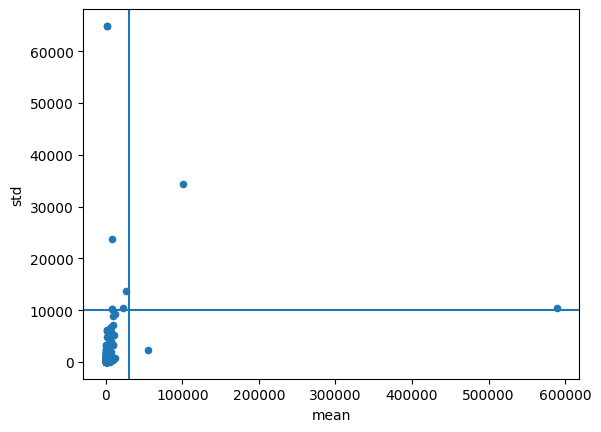

In [17]:
ax = all_stats[["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 10000)
ax.axvline(x = 0.3e5)

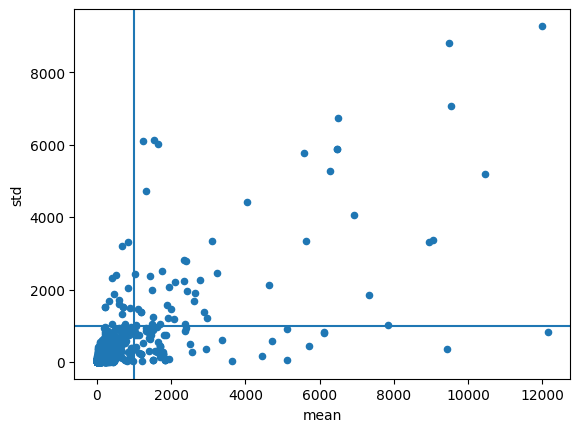

In [20]:
ax = all_stats[
  (all_stats["std"] < 10000) & (all_stats["mean"] < 0.5e5)
][["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 1000)
ax.axvline(x = 1000)


idx_min  idx_max
0      115056   115199
1      318240   318383
2      614736   614879
3      414288   414431
5      388944   389087
...       ...      ...
6380   669888   670031
6381   394704   394847
6382   199440   199583
6383   482976   483119
6384   791856   791999

[6245 rows x 2 columns]

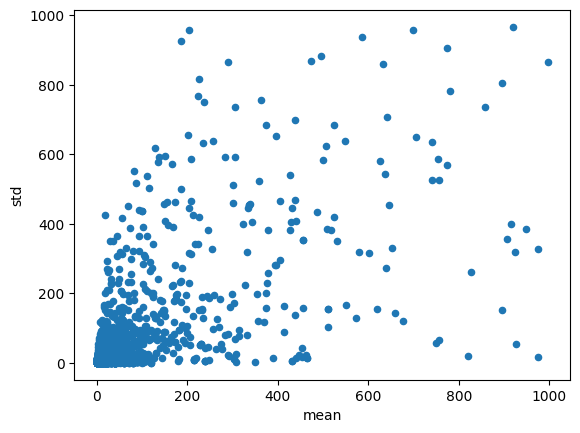

In [21]:
ax = all_stats[
  (all_stats["std"] < 1000) & (all_stats["mean"] < 1000)
][["mean", "std"]].plot.scatter(x="mean", y="std")

valid_idx_boundaries = all_stats[
  (all_stats["std"] < 1000) & (all_stats["mean"] < 1000)
][["idx_min", "idx_max"]]
valid_idx_boundaries

In [22]:
# filter invocations based on the selected indices
valid_idxs = []
for i in range(len(valid_idx_boundaries)):
  idx_min = valid_idx_boundaries.iloc[i]["idx_min"]
  idx_max = valid_idx_boundaries.iloc[i]["idx_max"]
  valid_idxs += list(range(idx_min, idx_max + 1))

filtered_invocations = all_invocations.loc[valid_idxs]
len(filtered_invocations)

899280

In [169]:
# flatten invocations
flat_invocations = flatten_invocations(filtered_invocations, "HashFunction")
flat_invocations.to_csv(
  os.path.join(data_folder, f"flat_invocations_{time_window}min.csv"), 
  index = False
)
flat_invocations

fid  hour  day  req
0        0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...     1    1    1
1        0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...     1    2    1
2        0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...     1    3    1
3        0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...     1    4    1
4        0001f8e959dcdff9098d97c72e9184e8b814ddd06f4c88...     1    5    1
...                                                    ...   ...  ...  ...
2098987  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...    24   10   19
2098988  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...    24   11   11
2098989  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...    24   12   46
2098990  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...    24   13   17
2098991  fff7862e80476cf8e355d27b856679f5bda38161b1d52d...    24   14    8

[2098992 rows x 4 columns]

### Aggregate by owner

In [93]:
# sum over all functions from each owner
all_invocations["HashApp"] += "-"
all_invocations["HashFunction"] += "-"
by_owner_invocations = all_invocations.groupby(["HashOwner", "time"]).sum()

by_owner_invocations#.reset_index()

13     7     6  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     2482  2721  3081   
                                                   1     2404  2783  3034   
                                                   2     2433  2773  3083   
                                                   3     2342  2805  3038   
                                                   4     2547  2866  3164   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 91       1     1     1   
                                                   92       1     1     1   
                                                   93       1     1     1   
                                                   94       1     1     1   
                                                   95       1     1     1   

                                                           12     4    10  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     3048  3222  3107   
                                                   1     3025  3233  3079   
                                                   2     3031  3255  3065   
                                                   3     3000  3241  3038   
                                                   4     3292  3348  3307   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 91       1     1     1   
                                                   92       1     1     1   
                                                   93       1     1     1   
                                                   94       1     1     1   
                                                   95       1     1     1   

                                                           11     5     1  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     3146  3186  3086   
                                                   1     3050  3138  3046   
                                                   2     3030  3195  3071   
                                                   3     3035  3127  3032   
                                                   4     3348  3239  3210   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 91       1     1     1   
                                                   92       1     1     1   
                                                   93       1     1     1   
                                                   94       1     1     1   
                                                   95       1     1     1   

                                                           14     2     3  \
HashOwner                                          time                     
00120a3b2acd94c5dab17ee482c500a76294c4e54fe32eb... 0     2186  3105  3470   
                                                   1     2154  3119  3426   
                                                   2     2122  3110  3432   
                                                   3     2108  3116  3460   
                                                   4     2310  3251  3516   
...                                                       ...   ...   ...   
ffdd3d1c6a84caf0b741293bfac9d0d9c6445b53dfc2941... 91       1     1     1   
                                                   92       1     1     1   
                                                   93       1     1     1   
                                                   94       1     1     1   
                                                   95       1     1     1   

                                                   

In [94]:
bo_stats = compute_statistics(by_owner_invocations.reset_index(), "HashOwner")
bo_stats

count         mean         std     min     25%     50%      75%  \
0     1344.0  2340.597470  470.348181  1524.0  1933.0  2194.5  2737.50   
1     1344.0     1.267857    1.550244     0.0     0.0     1.0     2.00   
2     1344.0     5.915923   10.791999     0.0     0.0     1.0     8.00   
3     1344.0     0.714286    2.053688     0.0     0.0     0.0     0.00   
4     1344.0     3.666667    1.700306     2.0     3.0     3.0     3.00   
...      ...          ...         ...     ...     ...     ...      ...   
2593  1344.0     5.994792    0.130762     2.0     6.0     6.0     6.00   
2594  1344.0    10.453125   10.899153     0.0     3.0     6.0    15.25   
2595  1344.0    14.143601    7.970781     2.0     7.0     8.0    20.00   
2596  1344.0    59.024554    0.725141    40.0    59.0    59.0    59.00   
2597  1344.0     0.999256    0.027277     0.0     1.0     1.0     1.00   

         max  idx_min  idx_max  
0     3516.0        0       95  
1        6.0       96      191  
2      112.0      192      287  
3       23.0      288      383  
4       19.0      384      479  
...      ...      ...      ...  
2593     7.0   248928   249023  
2594   111.0   249024   249119  
2595    33.0   249120   249215  
2596    60.0   249216   249311  
2597     1.0   249312   249407  

[2598 rows x 10 columns]

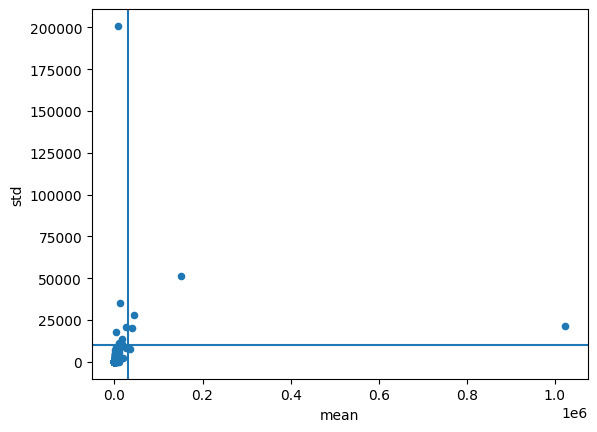

In [95]:
ax = bo_stats[["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 10000)
ax.axvline(x = 0.3e5)

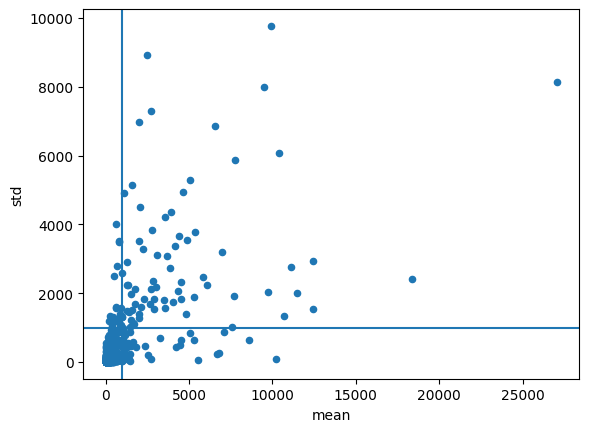

In [96]:
ax = bo_stats[
  (bo_stats["std"] < 10000) & (bo_stats["mean"] < 0.3e5)
][["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 1000)
ax.axvline(x = 1000)

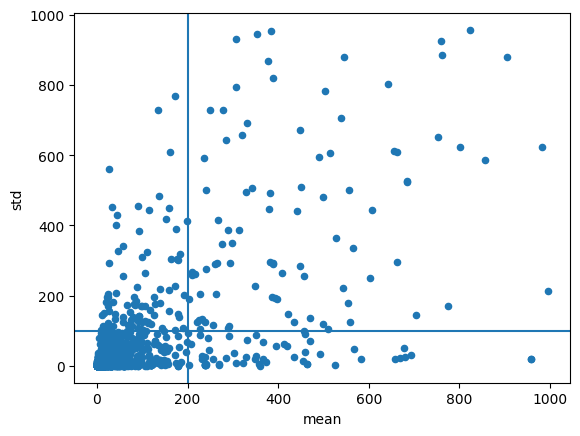

In [98]:
ax = bo_stats[
  (bo_stats["std"] < 1000) & (bo_stats["mean"] < 1000)
][["mean", "std"]].plot.scatter(x="mean", y="std")
ax.axhline(y = 100)
ax.axvline(x = 200)

idx_min  idx_max
19       1824     1919
20       1920     2015
26       2496     2591
32       3072     3167
33       3168     3263
...       ...      ...
2587   248352   248447
2592   248832   248927
2594   249024   249119
2595   249120   249215
2596   249216   249311

[631 rows x 2 columns]

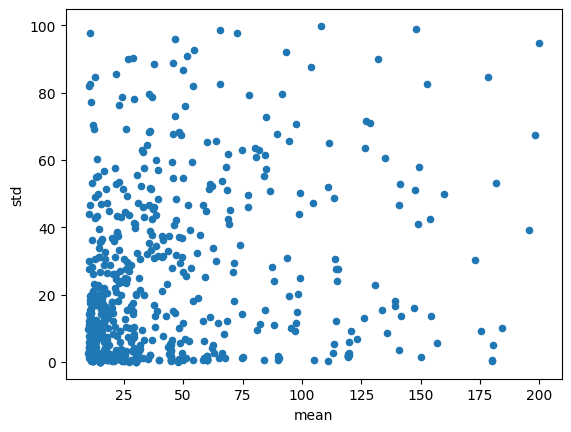

In [99]:
ax = bo_stats[
  (bo_stats["std"] < 100) & (bo_stats["mean"] < 200) & (bo_stats["mean"] > 10)
][["mean", "std"]].plot.scatter(x="mean", y="std")

valid_idx_boundaries = bo_stats[
  (bo_stats["std"] < 100) & (bo_stats["mean"] < 200) & (bo_stats["mean"] > 10)
][["idx_min", "idx_max"]]
valid_idx_boundaries

In [100]:
# filter invocations based on the selected indices
valid_idxs = []
for i in range(len(valid_idx_boundaries)):
  idx_min = valid_idx_boundaries.iloc[i]["idx_min"]
  idx_max = valid_idx_boundaries.iloc[i]["idx_max"]
  valid_idxs += list(range(idx_min, idx_max + 1))

by_owner_invocations = by_owner_invocations.reset_index()
filtered_invocations = by_owner_invocations.loc[valid_idxs]
len(filtered_invocations)

60576

In [101]:
# flatten invocations
bo_flat_invocations = flatten_invocations(filtered_invocations, "HashOwner")
bo_flat_invocations.to_csv(
  os.path.join(data_folder, f"by_owner_flat_invocations_{time_window}min.csv"), 
  index = False
)
bo_flat_invocations

fid  hour  day  req
0       01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...     1    1    2
1       01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...     1    2    3
2       01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...     1    3    2
3       01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...     1    4    3
4       01e0a1e7f551ecfb2b42677d3dd15e3023ca70bc1cee58...     1    5    3
...                                                   ...   ...  ...  ...
848059  ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...    96   10   59
848060  ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...    96   11   59
848061  ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...    96   12   59
848062  ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...    96   13   59
848063  ffadfa9308d4b130cf2e65daec075efb84befec9eee65e...    96   14   59

[848064 rows x 4 columns]

<Axes: >

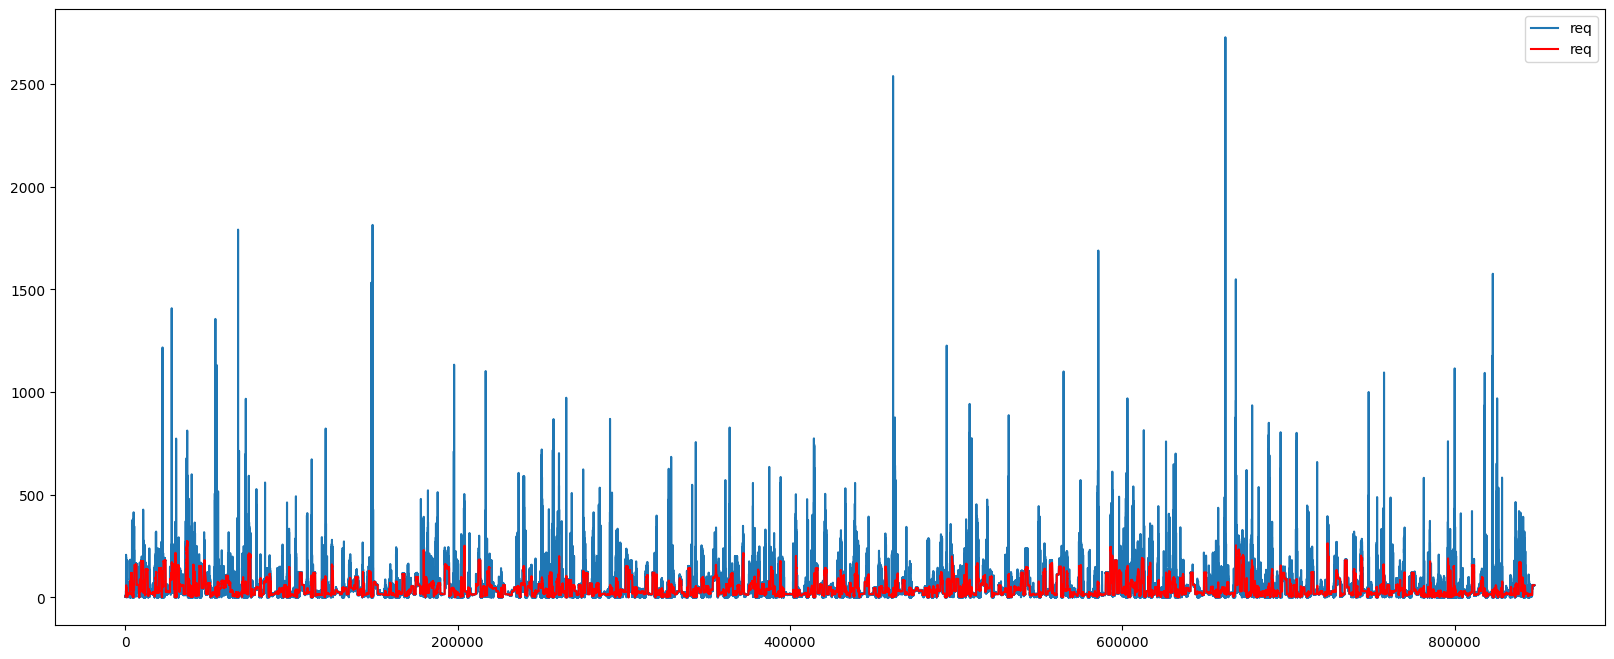

In [102]:
_, ax = plt.subplots(figsize = (20,8))
bo_flat_invocations.plot(y="req", ax = ax)
bo_flat_invocations.rolling(window = 144).mean(numeric_only=True).plot(
  y = "req",
  color = "r",
  ax = ax
)

In [103]:
len(filtered_invocations["HashOwner"].unique())

631

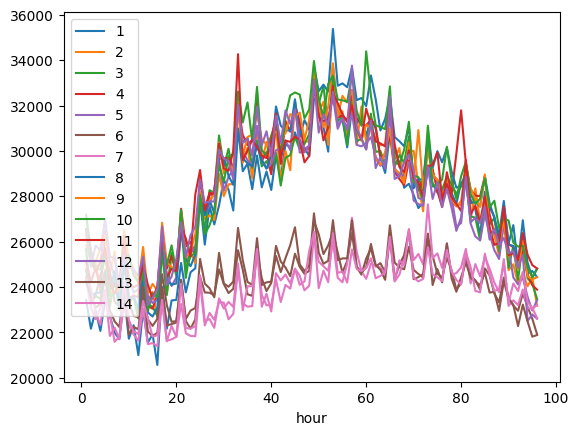

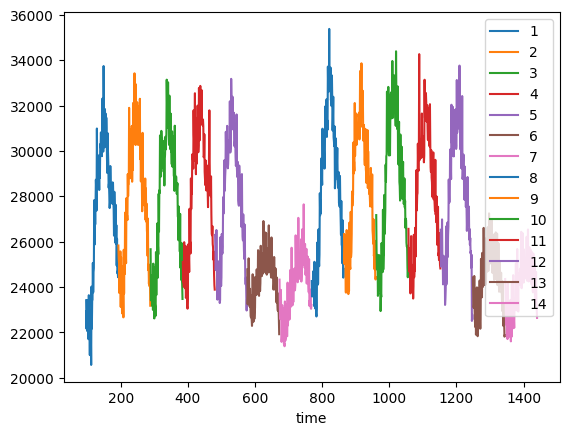

In [104]:
singlenode_req = bo_flat_invocations.groupby(["day", "hour"]).sum(
  numeric_only = True
)

colors = list(mcolors.TABLEAU_COLORS.values())[:7] * 2
_, ax1 = plt.subplots()
_, ax2 = plt.subplots()
for day, df1 in singlenode_req.groupby("day"):
  to_plot = df1.reset_index()
  to_plot.plot(
    x = "hour",
    y = "req",
    ax = ax1,
    label = day,
    color = colors[day - 1]
  )
  to_plot["time"] = to_plot["hour"] + day * to_plot["hour"].max()
  to_plot.plot(
    x = "time",
    y = "req",
    ax = ax2,
    label = day,
    color = colors[day - 1]
  )
# _, ax = plt.subplots(figsize = (20,8))
# bo_flat_invocations.plot(y="req", ax = ax)
# bo_flat_invocations.rolling(window = 144).mean(numeric_only=True).plot(
#   y = "req",
#   color = "r",
#   ax = ax
# )

In [314]:
req = alldays_functions_df.loc[
  alldays_functions_df["DAY"] == 1, [str(m) for m in range(1,1441)]
].transpose()
req.columns = [f"f{f}" for f in range(len(req.columns))]
req

f0  f1  f2  f3  f4  f5  f6  f7  f8  f9  ...  f6375  f6376  f6377  f6378  \
1      0   2   0   0   0   0   0   0   0   0  ...      1      0      0      0   
2      0   0   0   0   0   0   0   0   0   0  ...      0      0      0      0   
3      0   6   0   0   0   1   0   0   0   0  ...      0      0     11      0   
4      0   2   0   0   0   0   0   0   0   0  ...      0      0      0      0   
5      0   0   0   1   0   0   0   0   1   0  ...      1      0      0      0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...    ...   
1436   0   6   0   0   0   0   0   0   0   0  ...      0      0      0      0   
1437   0   2   0   0   0   0   0   0   0   0  ...      1      0      0      0   
1438   0   4   0   0   0   0   0   0   0   0  ...      0      0      0      0   
1439   0   2   0   0   0   0   0   0   0   0  ...      0      0      0      0   
1440   0   1   0   1   0   0   0   0   0   0  ...      0      0      0      0   

      f6379  f6380  f6381  f6382  f6383  f6384  
1         0      0      0      0      1      0  
2         0      0      0      0      0      0  
3         0      0      0      0      0      0  
4         0      0      0      0      0      3  
5         0      1      0      0      1      3  
...     ...    ...    ...    ...    ...    ...  
1436      0      0      0      0      0      0  
1437      0      0      0      0      1      1  
1438      0      0      0      0      0      1  
1439      0      0      0      0      0      0  
1440      0      1      0      0      0      0  

[1440 rows x 6385 columns]

In [233]:
req_stat = req.describe().transpose()
req_stat

count       mean         std  min  25%  50%   75%     max
f0     1440.0   0.000694    0.026352  0.0  0.0  0.0  0.00     1.0
f1     1440.0   1.764583    2.606881  0.0  0.0  0.0  3.00    14.0
f2     1440.0   0.311111    0.548307  0.0  0.0  0.0  1.00     3.0
f3     1440.0   0.200000    0.400139  0.0  0.0  0.0  0.00     1.0
f4     1440.0  78.681250  434.658420  0.0  0.0  0.0  0.00  6321.0
...       ...        ...         ...  ...  ...  ...   ...     ...
f6380  1440.0   0.200000    0.400139  0.0  0.0  0.0  0.00     1.0
f6381  1440.0   1.334028    1.385503  0.0  0.0  1.0  2.00     8.0
f6382  1440.0   0.069444    0.522633  0.0  0.0  0.0  0.00     4.0
f6383  1440.0   0.250000    0.433163  0.0  0.0  0.0  0.25     1.0
f6384  1440.0   0.507639    1.029082  0.0  0.0  0.0  1.00     8.0

[6385 rows x 8 columns]

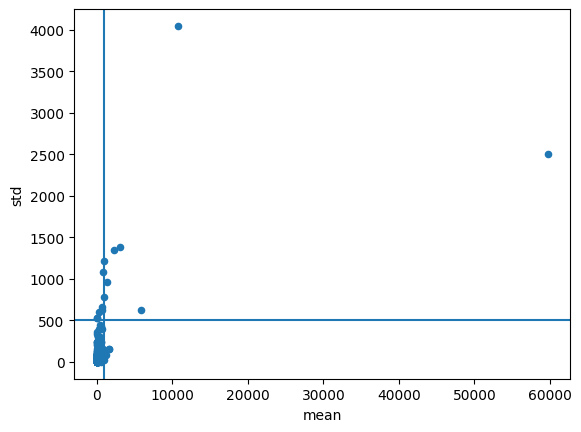

In [278]:
ax = req_stat.plot.scatter(x = "mean", y = "std")
ax.axvline(x = 1000)
ax.axhline(y = 500)

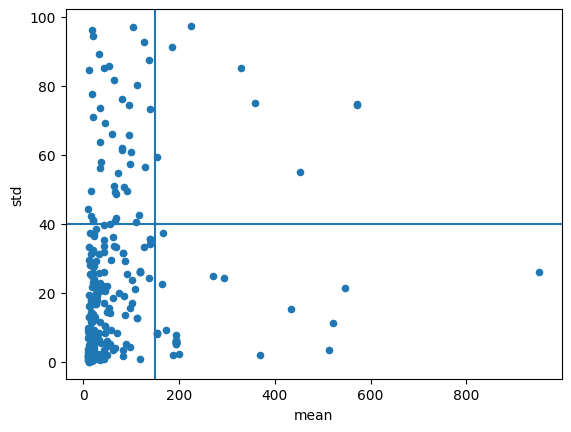

In [261]:
ax = req_stat[
  (req_stat["std"] < 100) & (req_stat["mean"] < 1000) & (req_stat["mean"] > 10)
].plot.scatter(x = "mean", y = "std")
ax.axvline(x = 150)
ax.axhline(y = 40)

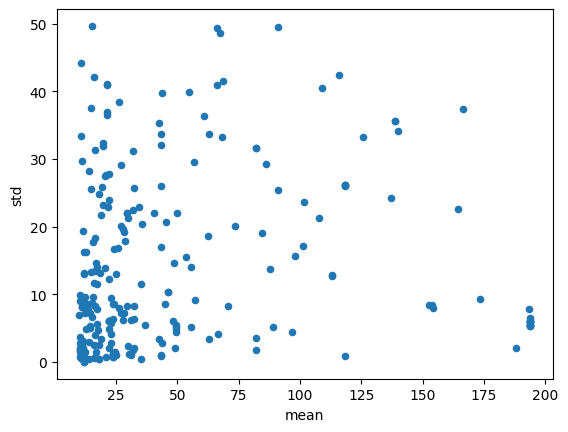

In [263]:
valid_functions = req_stat[
  (req_stat["std"] < 50) & (req_stat["mean"] < 200) & (req_stat["mean"] > 10)
].index

ax = req_stat[
  (req_stat["std"] < 50) & (req_stat["mean"] < 200) & (req_stat["mean"] > 10)
].plot.scatter(x="mean", y="std")

In [312]:
req = req.loc[:,valid_functions] + 1
req

f14  f16  f46  f50  f81  f124  f144  f168  f187  f191  ...  f6250  \
1      28   29   12  583   26     5     8   165    11    71  ...    287   
2      26   22    3  525   26     4     5   201    14    93  ...    286   
3      26   31   25  418   26     6     8   187    10    80  ...    297   
4      27   22    8  738   26     2     5   160    14   115  ...    319   
5      28   23    4  617   26     3     3   120    10   105  ...    312   
...   ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...    ...   
1436   28   24   75  634   26     3     3   501     9    54  ...    290   
1437   26   28   86  521   26     4     5   359    14    62  ...    290   
1438   26   24  139  411   26     6     2   411    13    48  ...    290   
1439   27   24   73  656   26     5     4   426    12    41  ...    290   
1440   28   23  123  591   26     3     7   423    13    60  ...    281   

      f6251  f6263  f6273  f6295  f6311  f6312  f6345  f6356  f6368  
1       196      7     35     55     40    149     49    153    489  
2       101     91     34     87     40    143      6    143    488  
3        70      7     34     89     40    125      6    121    516  
4        86      2     34     77     40    162     92    162    491  
5       105      8     34     68     40    118      6    121    487  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  
1436     97      2     35     79     41    124     79    114    486  
1437     89      2     34     84     42    124     42    124    500  
1438     81      8     34     71     43    124      6    130    498  
1439     95      2     34     78     40    118      6    115    499  
1440     90      2     34     80     40    121      6    124    493  

[1440 rows x 330 columns]

<Axes: >

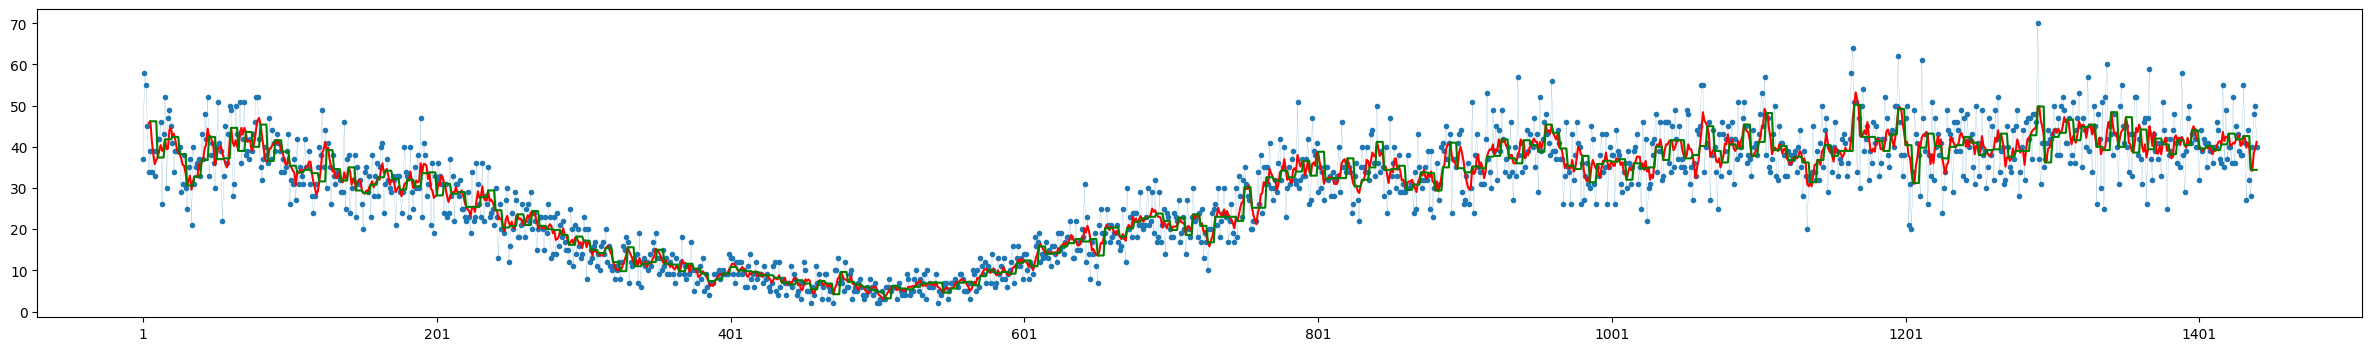

In [237]:
time_window = 5

moving_avg = req["f6188"].rolling(window = time_window).mean()
fixed_avg = np.repeat(
  req["f6188"].rolling(window = time_window, step = time_window).mean(), 
  time_window
)

_, ax = plt.subplots(figsize = (30,4))
req["f6188"].plot(marker = ".", linewidth = 0.1, ax = ax)
moving_avg.plot(color = "red", ax = ax)
fixed_avg.plot(color = "green", ax = ax)

In [238]:
fixed_avg_df = pd.DataFrame({
  funct: np.repeat(
    req[funct].rolling(
      window = time_window, step = time_window, min_periods = 0
    ).mean(), time_window
  ) for funct in req
})
fixed_avg_df.index = range(1, len(fixed_avg_df) + 1)
fixed_avg_df

f14   f16   f22   f46   f81  f88  f144  f187  f203  f208  ...  f6135  \
1     26.0  22.0  55.0  75.0  25.0  1.0   3.0  10.0  13.0   7.0  ...    8.0   
2     26.0  22.0  55.0  75.0  25.0  1.0   3.0  10.0  13.0   7.0  ...    8.0   
3     26.0  22.0  55.0  75.0  25.0  1.0   3.0  10.0  13.0   7.0  ...    8.0   
4     26.0  22.0  55.0  75.0  25.0  1.0   3.0  10.0  13.0   7.0  ...    8.0   
5     26.0  22.0  55.0  75.0  25.0  1.0   3.0  10.0  13.0   7.0  ...    8.0   
...    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...  ...    ...   
1436  26.0  22.4  30.4  86.4  25.0  1.0   2.0  11.0  13.0  13.4  ...   18.6   
1437  26.0  22.4  30.4  86.4  25.0  1.0   2.0  11.0  13.0  13.4  ...   18.6   
1438  26.0  22.4  30.4  86.4  25.0  1.0   2.0  11.0  13.0  13.4  ...   18.6   
1439  26.0  22.4  30.4  86.4  25.0  1.0   2.0  11.0  13.0  13.4  ...   18.6   
1440  26.0  22.4  30.4  86.4  25.0  1.0   2.0  11.0  13.0  13.4  ...   18.6   

      f6188  f6189  f6251  f6263  f6273  f6311  f6312  f6350  f6356  
1      37.0    1.0  183.0    8.0   34.0   40.0   98.0  108.0   93.0  
2      37.0    1.0  183.0    8.0   34.0   40.0   98.0  108.0   93.0  
3      37.0    1.0  183.0    8.0   34.0   40.0   98.0  108.0   93.0  
4      37.0    1.0  183.0    8.0   34.0   40.0   98.0  108.0   93.0  
5      37.0    1.0  183.0    8.0   34.0   40.0   98.0  108.0   93.0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  
1436   34.4    1.0   86.0   28.2   33.2   39.2  128.8   60.6  128.6  
1437   34.4    1.0   86.0   28.2   33.2   39.2  128.8   60.6  128.6  
1438   34.4    1.0   86.0   28.2   33.2   39.2  128.8   60.6  128.6  
1439   34.4    1.0   86.0   28.2   33.2   39.2  128.8   60.6  128.6  
1440   34.4    1.0   86.0   28.2   33.2   39.2  128.8   60.6  128.6  

[1440 rows x 271 columns]

In [239]:
errors = {
  "function": [],
  "rmse": [],
  "mae": [],
  "mape": [],
  # "cv": []
}
for f in req:
  errors["function"].append(f)
  errors["rmse"].append(
    ((req[f].values - fixed_avg_df[f].values) ** 2).mean() ** 0.5
  )
  errors["mae"].append(
    abs(req[f].values - fixed_avg_df[f].values).mean()
  )
  errors["mape"].append(
    (abs(req[f].values - fixed_avg_df[f].values) / req[f].values).mean()
  )
  # errors["cv"].append(
  #   errors["rmse"][-1] / fixed_avg_df[f].values
  # )
errors = pd.DataFrame(errors)
errors

function       rmse        mae      mape
0        f14   1.141880   0.635833  0.025569
1        f16   3.590149   2.966944  0.133027
2        f22  12.327408   9.834167  0.657282
3        f46  15.370882   9.423194  0.524208
4        f81   0.896908   0.260000  0.011379
..       ...        ...        ...       ...
266    f6273  13.008363   6.097222  0.142624
267    f6311  18.312223   9.042500  0.167864
268    f6312  28.407980  21.764722  0.194695
269    f6350  19.075825  16.348194  0.621381
270    f6356  28.426174  21.804861  0.194442

[271 rows x 4 columns]

In [240]:
errors.describe()

rmse         mae        mape
count  271.000000  271.000000  271.000000
mean    11.475655    7.016971    0.697564
std      9.841206    6.204219    1.562912
min      0.000000    0.000000    0.000000
25%      4.615391    2.802639    0.101300
50%      8.134255    5.485694    0.256310
75%     15.559297    9.151875    0.470499
max     43.986807   32.511111   11.051156

In [241]:
functions = errors[errors["mape"] > 0.3]["function"].values
len(functions) / len(errors)

0.4317343173431734

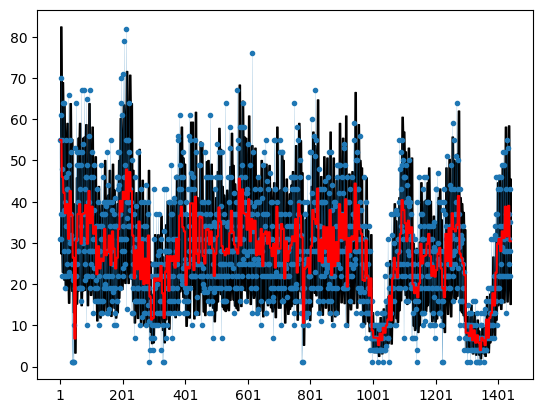

In [242]:
ax = req[functions[0]].plot(marker = ".", linewidth = 0.1)
fixed_avg_df[functions[0]].plot(color = "red", ax = ax)
ax.fill_between(
  x = fixed_avg_df.index,
  y1 = fixed_avg_df[functions[0]] * 0.5, 
  y2 = fixed_avg_df[functions[0]] * 1.5,
  color = "k"
)

In [243]:
errors[errors["function"] == functions[0]]

function       rmse       mae      mape
2      f22  12.327408  9.834167  0.657282

#### Error considering "fixed" average

In [297]:
time_window = 5
all_errors = pd.DataFrame()
for day in range(1,15): #list(range(1,6)) + list(range(8,13)):
  req = alldays_functions_df.loc[
    alldays_functions_df["DAY"] == day, [str(m) for m in range(1,1441)]
  ].transpose()
  req.columns = [f"f{f}" for f in range(len(req.columns))]
  req_stat = req.describe().transpose()
  valid_functions = req_stat[
    (req_stat["std"] < 500) & (req_stat["mean"] < 1000) & (req_stat["mean"] > 10)
  ].index
  req = req.loc[:,valid_functions] + 1
  fixed_avg_df = pd.DataFrame({
    funct: np.repeat(
      req[funct].rolling(
        window = time_window, step = time_window, min_periods = 0
      ).mean(), time_window
    ) for funct in req
  })
  fixed_avg_df.index = range(1, len(fixed_avg_df) + 1)
  errors = {
    "function": [],
    "rmse": [],
    "mae": [],
    "mape": [],
    "mupe": [],
    # "cv": []
  }
  for f in req:
    errors["function"].append(f)
    errors["rmse"].append(
      ((req[f].values - fixed_avg_df[f].values) ** 2).mean() ** 0.5
    )
    errors["mae"].append(
      abs(req[f].values - fixed_avg_df[f].values).mean()
    )
    errors["mape"].append(
      (abs(req[f].values - fixed_avg_df[f].values) / req[f].values).mean()
    )
    errors["mupe"].append(
      (np.array(
        [max(r - a, 0) for r, a in zip(req[f].values,fixed_avg_df[f].values)]
      ) / req[f].values).mean()
    )
    # errors["cv"].append(
    #   errors["rmse"][-1] / fixed_avg_df[f].values
    # )
  errors = pd.DataFrame(errors)
  errors["day"] = day
  all_errors = pd.concat([errors, all_errors], ignore_index = True)
all_errors

function       rmse        mae      mape      mupe  day
0         f14   1.111618   0.899306  0.035022  0.016568   14
1         f16   2.839870   2.308194  0.097775  0.041878   14
2         f46  10.862250   5.979583  1.042716  0.144463   14
3         f50  80.799908  50.292083  0.503526  0.038010   14
4         f81   1.140419   0.321944  0.014025  0.006157   14
...       ...        ...        ...       ...       ...  ...
5552    f6312  28.407980  21.764722  0.194695  0.076864    1
5553    f6345  66.939650  46.918472  6.038639  0.181401    1
5554    f6350  19.075825  16.348194  0.621381  0.112083    1
5555    f6356  28.426174  21.804861  0.194442  0.076919    1
5556    f6368  19.924036  11.492222  0.022974  0.010522    1

[5557 rows x 6 columns]

In [299]:
print(all_errors.describe())

print("---")
above_30 = all_errors[all_errors["mupe"] <= 0.3]
print(f"{len(above_30) / len(all_errors) * 100}%")

              rmse          mae         mape         mupe          day
count  5557.000000  5557.000000  5557.000000  5557.000000  5557.000000
mean     30.100665    15.058869     1.606570     0.075056     7.345330
std      48.714139    23.588985     4.559293     0.053700     3.999152
min       0.000000     0.000000     0.000000     0.000000     1.000000
25%       5.624228     3.619167     0.094032     0.031163     4.000000
50%      12.644251     7.476944     0.260251     0.069078     7.000000
75%      32.981251    16.839722     0.760875     0.108045    11.000000
max     528.508737   297.803611    60.484394     0.278646    14.000000
---
100.0%


<Axes: >

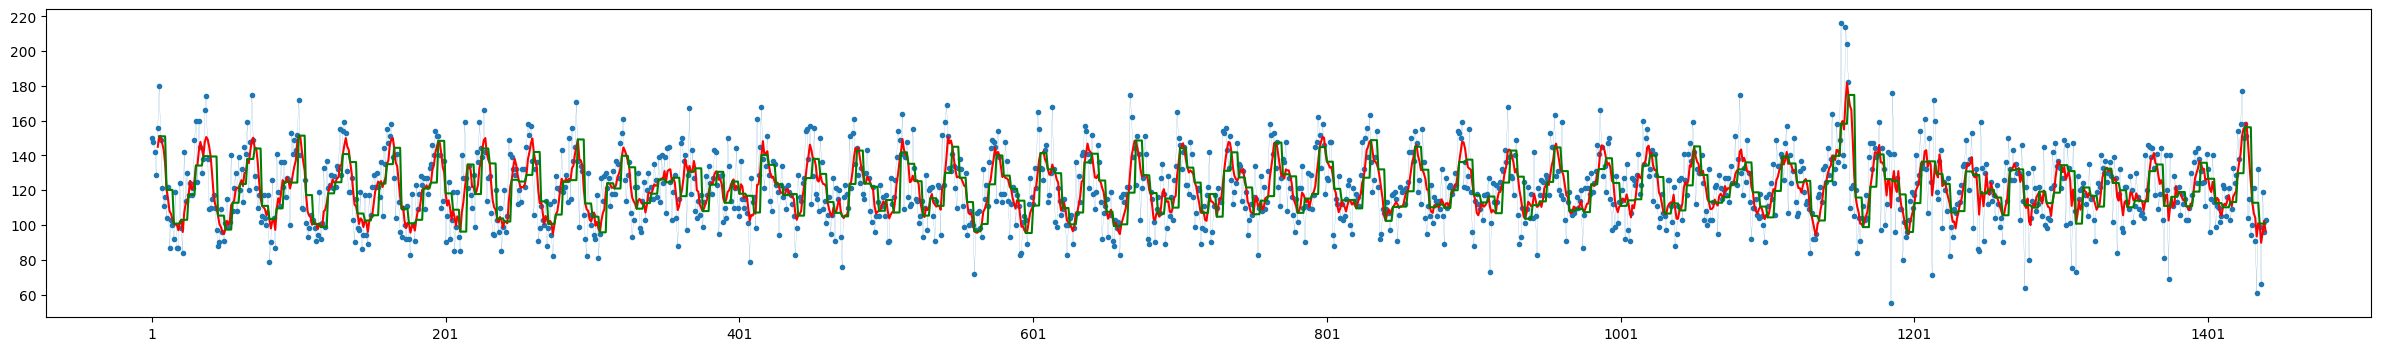

In [ ]:
moving_avg = req["f6312"].rolling(window = time_window).mean()
fixed_avg = np.repeat(
  req["f6312"].rolling(window = time_window, step = time_window).mean(), 
  time_window
)

_, ax = plt.subplots(figsize = (30,4))
req["f6312"].plot(marker = ".", linewidth = 0.1, ax = ax)
moving_avg.plot(color = "red", ax = ax)
fixed_avg.plot(color = "green", ax = ax)

<Axes: >

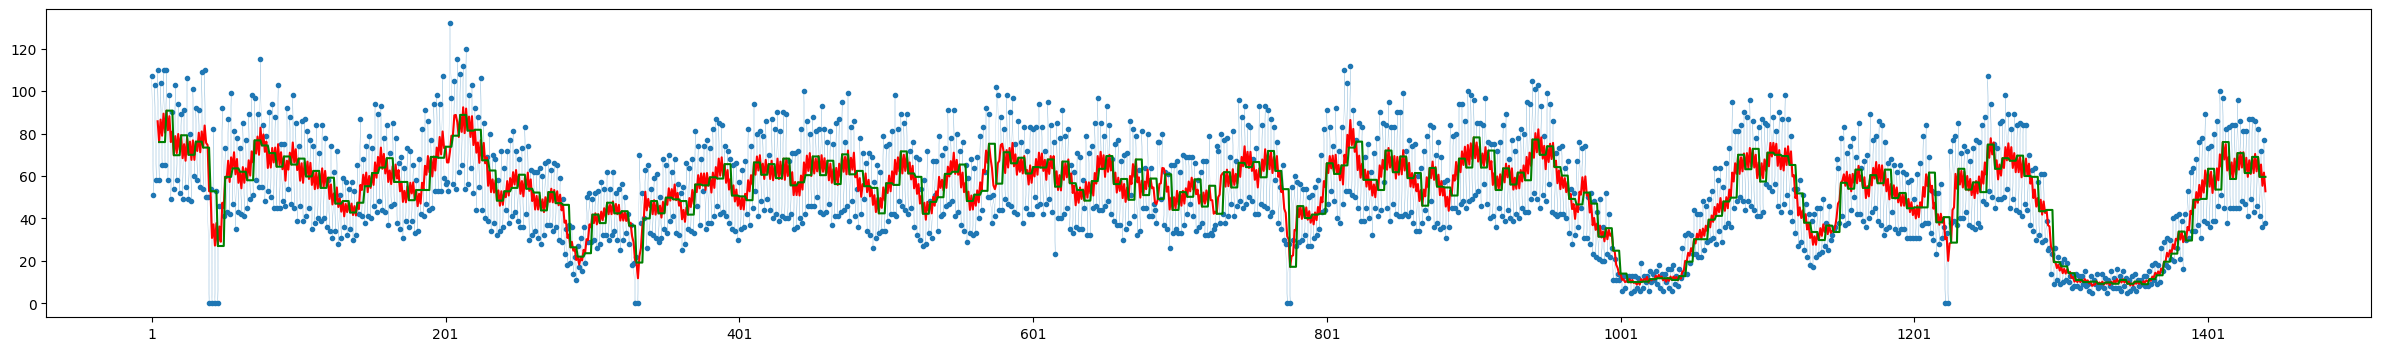

In [307]:
moving_avg = req["f6350"].rolling(window = time_window).mean()
fixed_avg = np.repeat(
  req["f6350"].rolling(window = time_window, step = time_window).mean(), 
  time_window
)

_, ax = plt.subplots(figsize = (30,4))
req["f6350"].plot(marker = ".", linewidth = 0.1, ax = ax)
moving_avg.plot(color = "red", ax = ax)
fixed_avg.plot(color = "green", ax = ax)

#### Error considering moving average

In [300]:
time_window = 5
all_errors = pd.DataFrame()
for day in range(1,15):#list(range(1,6)) + list(range(8,13)):
  req = alldays_functions_df.loc[
    alldays_functions_df["DAY"] == day, [str(m) for m in range(1,1441)]
  ].transpose()
  req.columns = [f"f{f}" for f in range(len(req.columns))]
  req_stat = req.describe().transpose()
  valid_functions = req_stat[
    (req_stat["std"] < 500) & (req_stat["mean"] < 1000) & (req_stat["mean"] > 10)
  ].index
  req = req.loc[:,valid_functions] + 1
  moving_avg_df = req.rolling(window = time_window, min_periods = 0).mean()
  errors = {
    "function": [],
    "rmse": [],
    "mae": [],
    "mape": [],
    "mupe": []
    # "cv": []
  }
  for f in req:
    errors["function"].append(f)
    errors["rmse"].append(
      ((req[f].values - moving_avg_df[f].values) ** 2).mean() ** 0.5
    )
    errors["mae"].append(
      abs(req[f].values - moving_avg_df[f].values).mean()
    )
    errors["mape"].append(
      (abs(req[f].values - moving_avg_df[f].values) / req[f].values).mean()
    )
    errors["mupe"].append(
      (np.array(
        [max(r - a, 0) for r, a in zip(req[f].values,moving_avg_df[f].values)]
      ) / req[f].values).mean()
    )
    # errors["cv"].append(
    #   errors["rmse"][-1] / fixed_avg_df[f].values
    # )
  errors = pd.DataFrame(errors)
  errors["day"] = day
  all_errors = pd.concat([errors, all_errors], ignore_index = True)
all_errors

function       rmse        mae      mape      mupe  day
0         f14   1.029032   0.866192  0.033618  0.016011   14
1         f16   2.407756   1.966366  0.083361  0.035780   14
2         f46   9.017318   5.016505  0.862489  0.121078   14
3         f50  66.123463  42.725324  0.339270  0.032181   14
4         f81   0.907561   0.233056  0.010029  0.004416   14
...       ...        ...        ...       ...       ...  ...
5552    f6312  19.338431  15.239468  0.136587  0.055613    1
5553    f6345  58.761974  44.929618  5.884903  0.182120    1
5554    f6350  15.191143  13.364965  0.457344  0.091644    1
5555    f6356  19.303278  15.238796  0.136187  0.055529    1
5556    f6368  16.361374   8.991898  0.018188  0.008224    1

[5557 rows x 6 columns]

In [301]:
print(all_errors.describe())

print("---")
above_30 = all_errors[all_errors["mupe"] <= 0.3]
print(f"{len(above_30) / len(all_errors) * 100}%")

              rmse          mae         mape         mupe          day
count  5557.000000  5557.000000  5557.000000  5557.000000  5557.000000
mean     23.121915    11.748135     1.180836     0.061624     7.345330
std      37.378579    18.258609     3.514881     0.045016     3.999152
min       0.000000     0.000000     0.000000     0.000000     1.000000
25%       4.623651     2.903333     0.076084     0.025077     4.000000
50%       9.824243     5.948611     0.198556     0.054929     7.000000
75%      25.581080    13.159653     0.564654     0.089137    11.000000
max     411.433478   253.331539    41.966710     0.232436    14.000000
---
100.0%


#### Error considering 75th percentile

In [308]:
time_window = 5
all_errors = pd.DataFrame()
for day in range(1,15):#list(range(1,6)) + list(range(8,13)):
  req = alldays_functions_df.loc[
    alldays_functions_df["DAY"] == day, [str(m) for m in range(1,1441)]
  ].transpose()
  req.columns = [f"f{f}" for f in range(len(req.columns))]
  req_stat = req.describe().transpose()
  valid_functions = req_stat[
    (req_stat["std"] < 500) & (req_stat["mean"] < 1000) & (req_stat["mean"] > 10)
  ].index
  req = req.loc[:,valid_functions] + 1
  fixed_p75_df = pd.DataFrame({
    funct: np.repeat(
      req[funct].rolling(
        window = time_window, step = time_window, min_periods = 0
      ).quantile(0.75), time_window
    ) for funct in req
  })
  fixed_p75_df.index = range(1, len(fixed_p75_df) + 1)
  errors = {
    "function": [],
    "rmse": [],
    "mae": [],
    "mape": [],
    "mupe": [],
    # "cv": []
  }
  for f in req:
    errors["function"].append(f)
    errors["rmse"].append(
      ((req[f].values - fixed_p75_df[f].values) ** 2).mean() ** 0.5
    )
    errors["mae"].append(
      abs(req[f].values - fixed_p75_df[f].values).mean()
    )
    errors["mape"].append(
      (abs(req[f].values - fixed_p75_df[f].values) / req[f].values).mean()
    )
    errors["mupe"].append(
      (np.array(
        [max(r - a, 0) for r, a in zip(req[f].values,fixed_p75_df[f].values)]
      ) / req[f].values).mean()
    )
    # errors["cv"].append(
    #   errors["rmse"][-1] / fixed_avg_df[f].values
    # )
  errors = pd.DataFrame(errors)
  errors["day"] = day
  all_errors = pd.concat([errors, all_errors], ignore_index = True)
all_errors

function       rmse        mae      mape      mupe  day
0         f14   1.478550   1.070833  0.042908  0.001480   14
1         f16   3.388707   2.713889  0.120698  0.021919   14
2         f46  11.907339   6.484722  1.301171  0.105701   14
3         f50  89.370250  56.554167  0.531956  0.021884   14
4         f81   1.122064   0.239583  0.010895  0.002273   14
...       ...        ...        ...       ...       ...  ...
5552    f6312  31.285180  23.684722  0.222945  0.049137    1
5553    f6345  80.203946  49.495139  7.586662  0.115870    1
5554    f6350  24.817319  19.340972  0.824736  0.035429    1
5555    f6356  31.209362  23.627083  0.222053  0.048865    1
5556    f6368  20.548317  12.437500  0.025290  0.007147    1

[5557 rows x 6 columns]

In [309]:
print(all_errors.describe())

print("---")
above_30 = all_errors[all_errors["mupe"] <= 0.3]
print(f"{len(above_30) / len(all_errors) * 100}%")

              rmse          mae         mape         mupe          day
count  5557.000000  5557.000000  5557.000000  5557.000000  5557.000000
mean     34.243197    16.625777     1.813620     0.054618     7.345330
std      55.926953    26.529139     5.191441     0.050487     3.999152
min       0.000000     0.000000     0.000000     0.000000     1.000000
25%       6.427534     3.825694     0.109728     0.017465     4.000000
50%      14.149622     8.342361     0.310001     0.042921     7.000000
75%      37.552241    18.539583     0.949807     0.076509    11.000000
max     568.923644   345.674306   111.668315     0.379318    14.000000
---
99.8740327514846%


<Axes: >

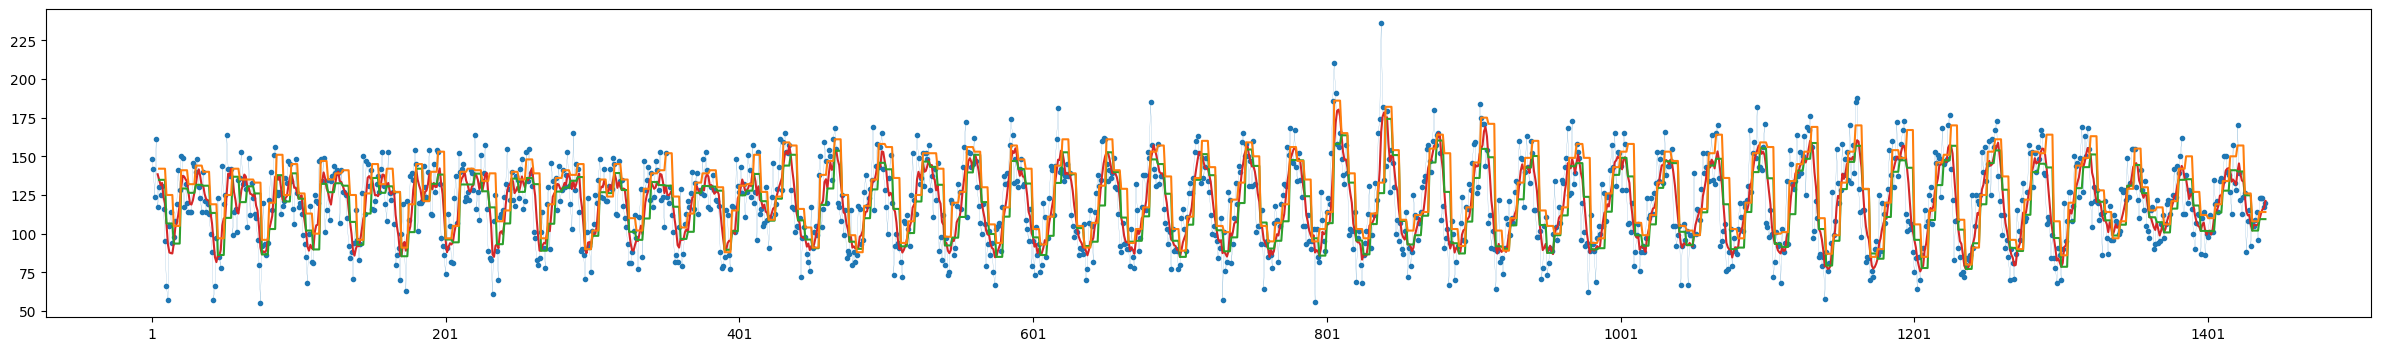

In [310]:
moving_avg = req["f6312"].rolling(window = time_window).mean()
fixed_avg = np.repeat(
  req["f6312"].rolling(window = time_window, step = time_window).mean(), 
  time_window
)
fixed_75p = np.repeat(
  req["f6312"].rolling(window = time_window, step = time_window).quantile(0.75), 
  time_window
)

_, ax = plt.subplots(figsize = (30,4))
req["f6312"].plot(marker = ".", linewidth = 0.1, ax = ax)
moving_avg.plot(color = mcolors.TABLEAU_COLORS["tab:red"], ax = ax)
fixed_avg.plot(color = mcolors.TABLEAU_COLORS["tab:green"], ax = ax)
fixed_75p.plot(color = mcolors.TABLEAU_COLORS["tab:orange"], ax = ax)

<Axes: >

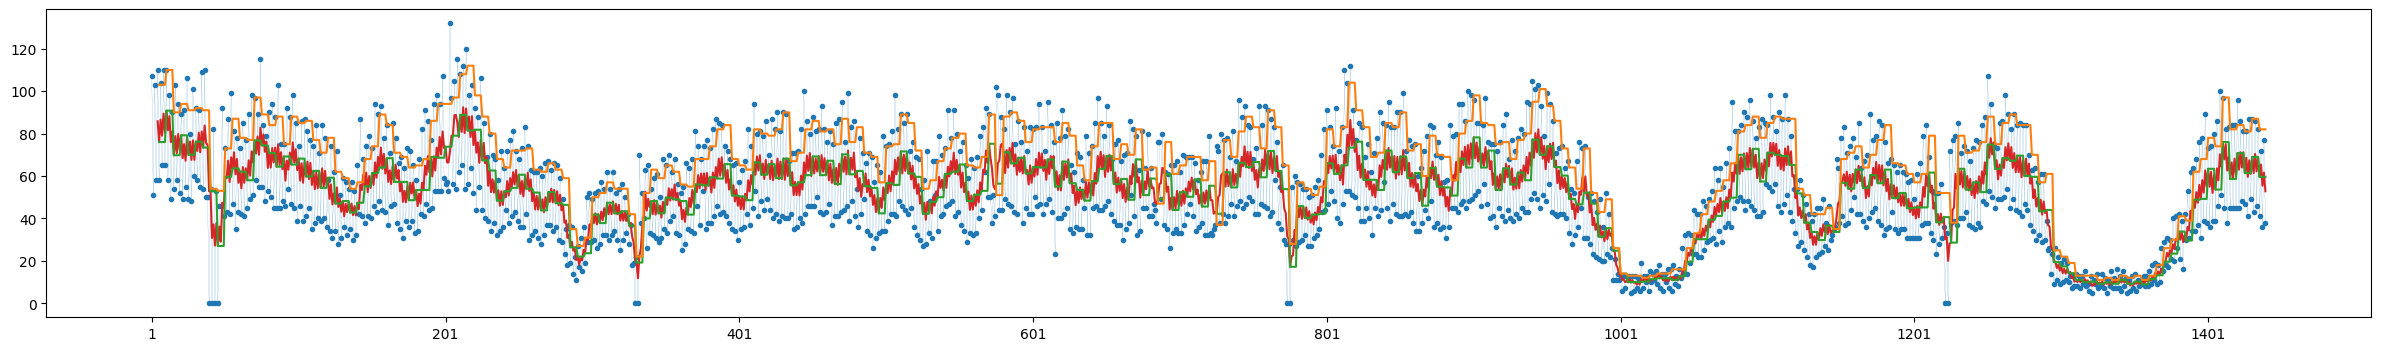

In [315]:
moving_avg = req["f6350"].rolling(window = time_window).mean()
fixed_avg = np.repeat(
  req["f6350"].rolling(window = time_window, step = time_window).mean(), 
  time_window
)
fixed_75p = np.repeat(
  req["f6350"].rolling(window = time_window, step = time_window).quantile(0.75), 
  time_window
)

_, ax = plt.subplots(figsize = (30,4))
req["f6350"].plot(marker = ".", linewidth = 0.1, ax = ax)
moving_avg.plot(color = mcolors.TABLEAU_COLORS["tab:red"], ax = ax)
fixed_avg.plot(color = mcolors.TABLEAU_COLORS["tab:green"], ax = ax)
fixed_75p.plot(color = mcolors.TABLEAU_COLORS["tab:orange"], ax = ax)